# Find the Area Harvested for Crops

In [24]:
import pandas as pd
import os

In [25]:
%run Methods.ipynb

test_prepData (__main__.TestDataPrep) ... ok
test_withNA (__main__.TestDataPrep) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.035s

OK


In [26]:
pathToData = os.path.join(os.getcwd(), "Data", "Production_Crops_Livestock_E_All_Data.csv")
agData = pd.read_csv(pathToData, encoding="latin-1")

Does each item have area harvested element to it? 

In [27]:
itemCol = agData['Item']
elementCol = agData['Element']
itemToElementMap = {}

for item, element in zip(itemCol, elementCol):
    curSet = itemToElementMap.get(item, set())
    curSet.add(element)
    itemToElementMap[item] = curSet

Not every item will have yield or area harvested data. Pick out items with area harvested. 

In [28]:
itemsWithArea = set()
for item in itemToElementMap.keys():
    elements = itemToElementMap[item]
    if 'Area harvested' in elements:
        itemsWithArea.add(item)
print(itemsWithArea)

{'Cherries, sour', 'Almonds, with shell', 'Tea', 'Vanilla', 'Currants', 'Hempseed', 'Grapes', 'Melons, other (inc.cantaloupes)', 'Anise, badian, fennel, coriander', 'Roots and Tubers, Total', 'Hazelnuts, with shell', 'Fruit, pome nes', 'Millet', 'Wheat', 'Oats', 'Pigeon peas', 'Sesame seed', 'Berries nes', 'Potatoes', 'Peas, green', 'Onions, dry', 'Oranges', 'Hemp tow waste', 'Sugar Crops Primary', 'Carobs', 'Fruit, citrus nes', 'Ginger', 'Brazil nuts, with shell', 'Spices nes', 'Cabbages and other brassicas', 'Vetches', 'Gooseberries', 'Avocados', 'Cassava', 'Watermelons', 'Yams', 'Seed cotton', 'Hops', 'Beans, green', 'Vegetables, leguminous nes', 'Tangerines, mandarins, clementines, satsumas', 'Persimmons', 'Yautia (cocoyam)', 'Kola nuts', 'Canary seed', 'Sugar beet', 'Coffee, green', 'Taro (cocoyam)', 'Poppy seed', 'Kiwi fruit', 'Carrots and turnips', 'Sweet potatoes', 'Cucumbers and gherkins', 'Figs', 'Lentils', 'Jojoba seed', 'Flax fibre and tow', 'Cashew nuts, with shell', 'Frui

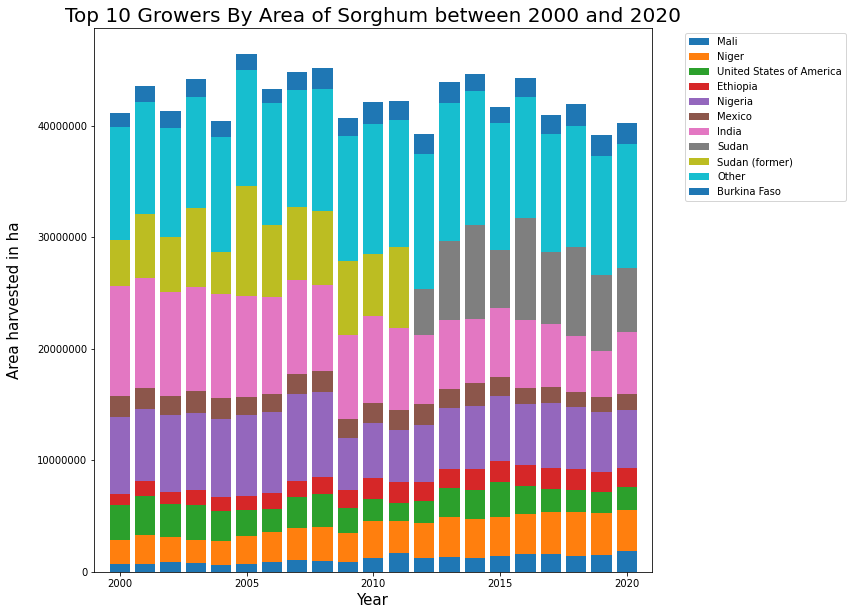

In [29]:
plotProductionCrop(agData, "Area harvested", "Sorghum", 2000, 2020, 10, plottingFunc=stackBarPlot)

Plotting sorghum, Why does plot go up to 2020 if you do top 25 but only up to before 2015 if top 10? Only happens if element is area harvested. (Answer: it's because Sudan (former) becomes NAN from 2011 and since Nigeria is plotted above it, it too gets cut off)

In [30]:
agDataSorghum = prepData("Sorghum", element="Area harvested")[0]
agDataSorghum[agDataSorghum['Label'] == "Nigeria"]

,Label,Year,Amount
6,Nigeria,Y2000,6885000.0
16,Nigeria,Y2001,6437000.0
26,Nigeria,Y2002,6849000.0
36,Nigeria,Y2003,6935000.0
46,Nigeria,Y2004,7031000.0
56,Nigeria,Y2005,7284000.0
66,Nigeria,Y2006,7308000.0
76,Nigeria,Y2007,7812000.0
86,Nigeria,Y2008,7617000.0
96,Nigeria,Y2009,4736830.0


In [31]:
agData[agData["Item"] == "Beehives"]

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
256,3,Albania,1181,Beehives,5114,Stocks,No,95100.0,NaN,92800.0,...,302962.0,NaN,289962.0,NaN,285455.0,NaN,288329.0,NaN,357984.0,NaN
599,4,Algeria,1181,Beehives,5114,Stocks,No,100000.0,*,105000.0,...,416659.0,Im,421765.0,Im,415615.0,Im,417638.0,Im,419934.0,Im
927,7,Angola,1181,Beehives,5114,Stocks,No,1000000.0,F,1000000.0,...,1157538.0,Im,1157854.0,Im,1156045.0,Im,1157065.0,Im,1158085.0,Im
1357,9,Argentina,1181,Beehives,5114,Stocks,No,650000.0,NaN,650000.0,...,2936838.0,Im,2982920.0,Im,2974045.0,Im,2978646.0,Im,2983247.0,Im
1735,1,Armenia,1181,Beehives,5114,Stocks,No,NaN,NaN,NaN,...,245396.0,NaN,237303.0,NaN,236242.0,NaN,237941.0,NaN,228152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74430,5801,Least Developed Countries,1181,Beehives,5114,Stocks,No,5001150.0,A,5009250.0,...,13306903.0,A,13726651.0,A,14311406.0,A,14209954.0,A,14212348.0,A
75050,5802,Land Locked Developing Countries,1181,Beehives,5114,Stocks,No,676350.0,A,690850.0,...,9831011.0,A,10291711.0,A,11215036.0,A,11199567.0,A,11288201.0,A
75691,5803,Small Island Developing States,1181,Beehives,5114,Stocks,No,248176.0,A,238701.0,...,429454.0,A,423217.0,A,435560.0,A,452840.0,A,471055.0,A
76207,5815,Low Income Food Deficit Countries,1181,Beehives,5114,Stocks,No,9795581.0,A,9837735.0,...,27329317.0,A,28252159.0,A,28616130.0,A,28242550.0,A,28594689.0,A
